# Pymaceuticals Inc.
---

### Analysis

- 1) Capomulin and Ramicane seem to be the most effective treatment for the tumor based on the mean tumor volumes at the final endpoints. With no outliers and a small enought std.dev, we can be confident in our inference.
- 2) Weight and tumor volume have a high positive correlation.
- 3) All other treatments either failed to decrease tumor volume or could have contributed to an increase. The average tumor volume of all the mice at their final endpoints of all treaments other than capomulin and ramicance is higher than tumor volumes at initial timepoints.

 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_initial = pd.merge(study_results,mouse_metadata,how="left")


# Display the data table for preview
mouse_data_initial




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = mouse_data_initial["Mouse ID"].nunique()
number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_list = mouse_data_initial.duplicated(subset=["Mouse ID","Timepoint"],keep=False)


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_info = mouse_data_initial[duplicate_list]
duplicate_mouse_info



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data_initial.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="first")
g989info = mouse_data[mouse_data["Mouse ID"] == "g989"]
g989info


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [14]:
# Checking the number of mice in the clean DataFrame.
# PLEASE NOTE: I DID NOT DROP mouseID: g989 from the database altogether.
# I only deleted the duplicated rows.(as seen in two cells above) 
# Therefore, my number of mice is still 249. I disagree that just because there are duplicated rows that we should remove
# all rows of mouseID: g989 as expected in the given started code.

number_of_mice_cleaned = mouse_data["Mouse ID"].nunique() 
number_of_mice_cleaned


249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
stats_summary1 = mouse_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"]

mean = stats_summary1.mean()
median = stats_summary1.median()
variance =  stats_summary1.var()
std_deviation = stats_summary1.std()
sem_error = stats_summary1.sem()

manual_stats_table = pd.DataFrame({
        "Mean Tumor Volume" : mean,
        "Median Tumor Volume" : median,
        "Tumor Volume Variance" : variance,
        "Tumor Volume Std. Dev." : std_deviation,
        "Tumor Volume Std. Err." : sem_error
        })
manual_stats_table.style.set_caption("Tumor Volume (mm3)")


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary = mouse_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).style.set_caption("Tumor Volume (mm3)")
stats_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Obesrved Mouse Timepoints'>

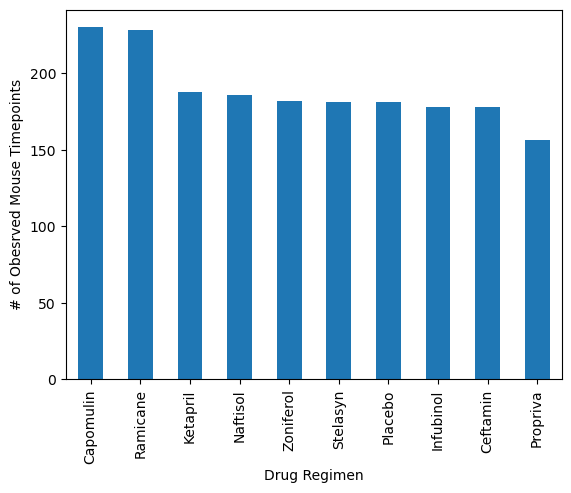

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data["Drug Regimen"].value_counts().plot(kind="bar",ylabel="# of Obesrved Mouse Timepoints")


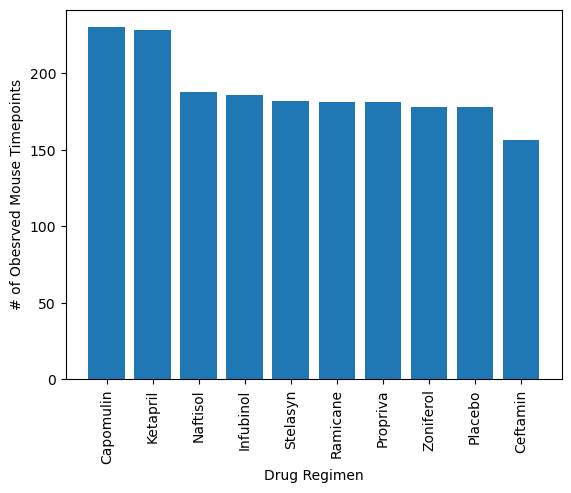

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
observed_timepoints_per_drug = mouse_data["Drug Regimen"].value_counts()
drug_list = mouse_data["Drug Regimen"].unique()

plt.bar(drug_list,observed_timepoints_per_drug)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Obesrved Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()



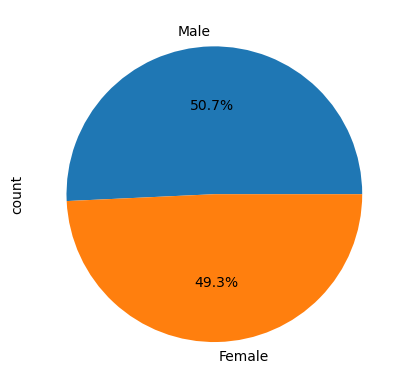

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male","Female"]
sex_count = mouse_data["Sex"].value_counts()

# Make the pie chart
mouse_data["Sex"].value_counts().plot(kind="pie",labels=["Male","Female"],autopct= '%1.1f%%')
plt.show()

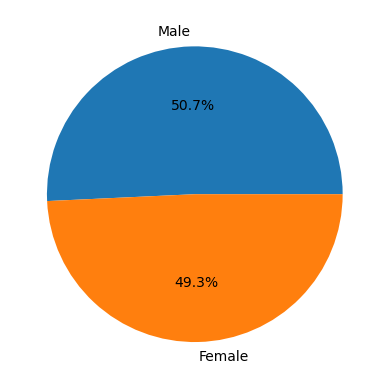

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(sex_count,labels=labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = mouse_data.groupby(by="Mouse ID")["Tumor Volume (mm3)"].agg("last")
final_tumor_volume


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_final_tumor = pd.merge(mouse_metadata,final_tumor_volume,how="left",on="Mouse ID")
# Filter the data to only include the treatments of interest
df_final_tumor = df_final_tumor[(df_final_tumor["Drug Regimen"] == "Capomulin") | (df_final_tumor["Drug Regimen"] == "Ramicane")
                                | (df_final_tumor["Drug Regimen"] == "Infubinol") | (df_final_tumor["Drug Regimen"] == "Ceftamin")]
# Rename Final Tumor Volume column
df_final_tumor = df_final_tumor.rename(columns={"Tumor Volume (mm3)" : "Final Tumor Volume (mm3)"}).reset_index(drop=True)
df_final_tumor.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,22.050126
1,s185,Capomulin,Female,3,17,23.343598
2,x401,Capomulin,Female,16,15,28.484033
3,m601,Capomulin,Male,22,17,28.430964
4,g791,Ramicane,Male,11,16,29.128472


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
def get_treatment_data(treatment):
    treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
    if treatment in treatments_list:
        treatment_filter = df_final_tumor[df_final_tumor["Drug Regimen"] == treatment]
        treatment_data = treatment_filter["Final Tumor Volume (mm3)"].to_list()
        return treatment_data

final_capomulin_data = get_treatment_data("Capomulin")
final_ramicane_data = get_treatment_data("Ramicane")
final_infubinol_data = get_treatment_data("Infubinol")
ceftamin_data = get_treatment_data("Ceftamin")     
       

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
#  add subset
# Determine outliers using upper and lower bounds


# Calculate Capomulin Outliers

cap_data = df_final_tumor[df_final_tumor["Drug Regimen"]=="Capomulin"]
cap_q1 = cap_data["Final Tumor Volume (mm3)"].quantile(0.25)
cap_q3 = cap_data["Final Tumor Volume (mm3)"].quantile(0.75)
cap_iqr = cap_q3 - cap_q1
cap_upperlim = cap_q3 + (cap_iqr*1.5)
cap_lowerlim = cap_q1 - (cap_iqr*1.5)
cap_outliers = cap_data[((cap_data["Final Tumor Volume (mm3)"] > cap_upperlim) | 
                                    (cap_data["Final Tumor Volume (mm3)"] < cap_lowerlim))]


print(f"Capomulin's potential outliers: {cap_outliers}")

#Calculate Ramicane Outliers

ram_data = df_final_tumor[df_final_tumor["Drug Regimen"]=="Ramicane"]
ram_q1 = ram_data["Final Tumor Volume (mm3)"].quantile(0.25)
ram_q3 = ram_data["Final Tumor Volume (mm3)"].quantile(0.75)
ram_iqr = ram_q3 - ram_q1
ram_upperlim = ram_q3 + (ram_iqr*1.5)
ram_lowerlim = ram_q1 - (ram_iqr*1.5)
ram_outliers = ram_data[((ram_data["Final Tumor Volume (mm3)"] > ram_upperlim) | 
                                    (ram_data["Final Tumor Volume (mm3)"] < ram_lowerlim))]

print(f"Ramicane's potential outliers: {ram_outliers}")

#Calculate Infubinol Outliers

inf_data = df_final_tumor[df_final_tumor["Drug Regimen"]=="Infubinol"]
inf_q1 = inf_data["Final Tumor Volume (mm3)"].quantile(0.25)
inf_q3 = inf_data["Final Tumor Volume (mm3)"].quantile(0.75)
inf_iqr = inf_q3 - inf_q1
inf_upperlim = inf_q3 + (inf_iqr*1.5)
inf_lowerlim = inf_q1 - (inf_iqr*1.5)
inf_outliers = inf_data[((inf_data["Final Tumor Volume (mm3)"] > inf_upperlim) | 
                                    (inf_data["Final Tumor Volume (mm3)"] < inf_lowerlim))]
inf_outliers_value = inf_outliers["Final Tumor Volume (mm3)"]

print(f"Infubinol's potential outliers: {inf_outliers_value}")

# Calculate Ceftamin Outliers

ceft_data = df_final_tumor[df_final_tumor["Drug Regimen"]=="Ceftamin"]
ceft_q1 = ceft_data["Final Tumor Volume (mm3)"].quantile(0.25)
ceft_q3 = ceft_data["Final Tumor Volume (mm3)"].quantile(0.75)
ceft_iqr = ceft_q3 - ceft_q1
ceft_upperlim = ceft_q3 + (ceft_iqr*1.5)
ceft_lowerlim = ceft_q1 - (ceft_iqr*1.5)
ceft_outliers = ceft_data[((ceft_data["Final Tumor Volume (mm3)"] > ceft_upperlim) | 
                                    (ceft_data["Final Tumor Volume (mm3)"] < ceft_lowerlim))]

print(f"Capomulin's potential outliers: {ceft_outliers}")





Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume (mm3)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume (mm3)]
Index: []
Infubinol's potential outliers: 58    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume (mm3)]
Index: []


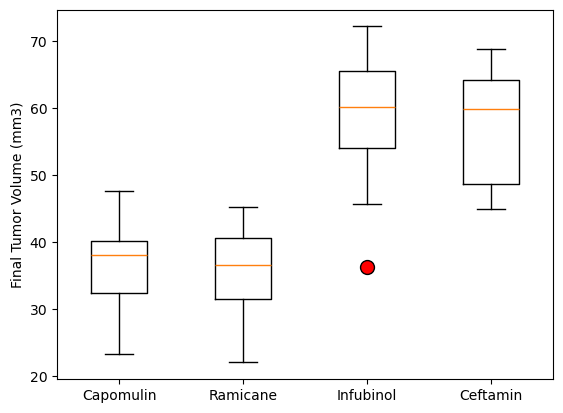

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Generate all 4 boxplots on same figure
treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig, axes = plt.subplots()

plt.boxplot([final_capomulin_data,final_ramicane_data,final_infubinol_data,ceftamin_data], flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.xticks([1, 2, 3, 4], treatments_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

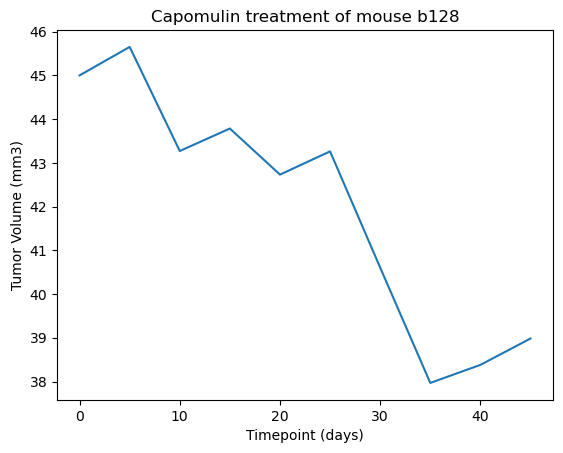

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseb128_data = mouse_data[mouse_data["Mouse ID"] == "b128"]
mouseb128_tp = mouseb128_data["Timepoint"]
mouseb128_tv = mouseb128_data["Tumor Volume (mm3)"]


plt.plot(mouseb128_tp,mouseb128_tv)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

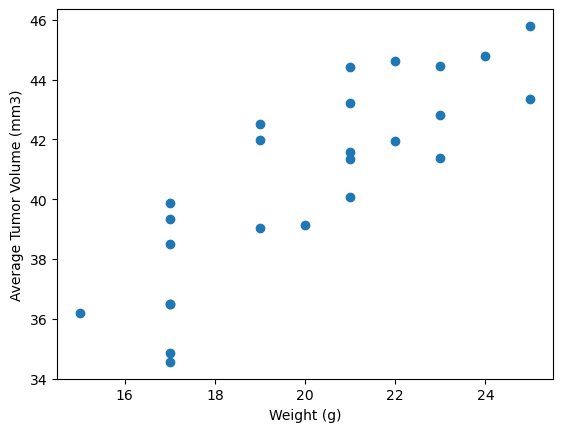

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
capomulin_weight_data = capomulin_average["Weight (g)"]
capomulin_average_data = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(capomulin_weight_data,capomulin_average_data)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


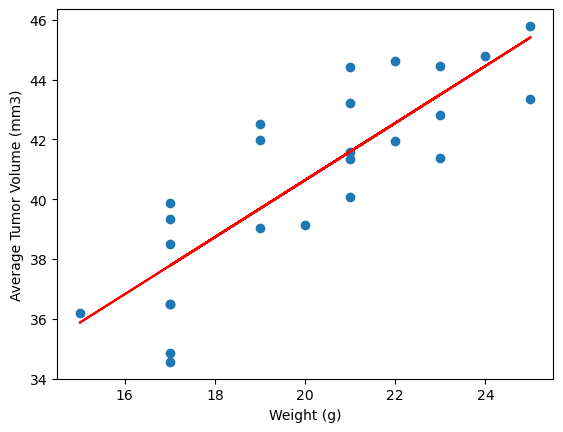

In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope,intercept,r,p,std_err = st.linregress(capomulin_weight_data,capomulin_average_data)
reg_line = slope * capomulin_weight_data + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(r,2)}")

plt.scatter(capomulin_weight_data,capomulin_average_data)
plt.plot(capomulin_weight_data,reg_line,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


